In [19]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns



import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 16})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


import sklearn.neighbors as skn
import sklearn.metrics as skm

In [20]:
#Read in
#Rows = 5043
mmdf = pd.read_csv('movie_metadata.csv')

In [21]:
mmdf.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [22]:
mmdf = mmdf.drop(columns = ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'language', 'budget','director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'movie_imdb_link', 'num_voted_users', 'num_critic_for_reviews', 'color','movie_facebook_likes','plot_keywords','aspect_ratio', 'num_user_for_reviews'], axis = 1)
#dropped all facebook like columns (director, actors 1-3, cast_total, movie_facebook_likes) because of multiple columns displaying values of 0
mmdf.head()

,duration,gross,genres,movie_title,country,content_rating,title_year,imdb_score
0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,USA,PG-13,2009.0,7.9
1,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,USA,PG-13,2007.0,7.1
2,148.0,200074175.0,Action|Adventure|Thriller,Spectre,UK,PG-13,2015.0,6.8
3,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,USA,PG-13,2012.0,8.5
4,NaN,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,7.1


In [23]:
cr = mmdf['content_rating'].value_counts().to_dict()
tv = cr['TV-14']
tv

30

In [24]:
mmdf['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

In [25]:
#Takes out rows rated 'TV-14'
#Rows = 5013
mmdf = mmdf[mmdf.content_rating != 'TV-14']
mmdf = mmdf[mmdf.content_rating != 'TV-Y']
mmdf = mmdf[mmdf.content_rating != 'TV-Y7']
mmdf = mmdf[mmdf.content_rating != 'M']
mmdf = mmdf[mmdf.content_rating != 'GP']
mmdf = mmdf[mmdf.content_rating != 'NC-17']
mmdf = mmdf[mmdf.content_rating != 'Passed']
mmdf = mmdf[mmdf.content_rating != 'TV-PG']
mmdf = mmdf[mmdf.content_rating != 'TV-MA']
mmdf = mmdf[mmdf.content_rating != 'X']
mmdf = mmdf[mmdf.content_rating != 'TV-G']
mmdf = mmdf[mmdf.content_rating != 'X']
mmdf = mmdf[mmdf.content_rating != 'Unrated']
mmdf = mmdf[mmdf.content_rating != 'Approved']




mmdf.head()

,duration,gross,genres,movie_title,country,content_rating,title_year,imdb_score
0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,USA,PG-13,2009.0,7.9
1,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,USA,PG-13,2007.0,7.1
2,148.0,200074175.0,Action|Adventure|Thriller,Spectre,UK,PG-13,2015.0,6.8
3,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,USA,PG-13,2012.0,8.5
4,NaN,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,7.1


In [26]:
mmdf['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Name: content_rating, dtype: int64

In [27]:
#prints remaining rows with nan values
n_nan = mmdf[0:].isna().sum()
print(n_nan)

duration           14
gross             728
genres              0
movie_title         0
country             3
content_rating    303
title_year         43
imdb_score          0
dtype: int64


In [28]:
#drop rows with nan values.
#Rows = 3761
mmdf = mmdf.dropna(how = 'any')
mmdf.head()

,duration,gross,genres,movie_title,country,content_rating,title_year,imdb_score
0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,USA,PG-13,2009.0,7.9
1,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,USA,PG-13,2007.0,7.1
2,148.0,200074175.0,Action|Adventure|Thriller,Spectre,UK,PG-13,2015.0,6.8
3,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,USA,PG-13,2012.0,8.5
5,132.0,73058679.0,Action|Adventure|Sci-Fi,John Carter,USA,PG-13,2012.0,6.6


In [29]:
#Filter by movie years > 1984
mmdf = mmdf[mmdf.title_year >= 1984]
mmdf.head()

,duration,gross,genres,movie_title,country,content_rating,title_year,imdb_score
0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,USA,PG-13,2009.0,7.9
1,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,USA,PG-13,2007.0,7.1
2,148.0,200074175.0,Action|Adventure|Thriller,Spectre,UK,PG-13,2015.0,6.8
3,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,USA,PG-13,2012.0,8.5
5,132.0,73058679.0,Action|Adventure|Sci-Fi,John Carter,USA,PG-13,2012.0,6.6


In [30]:
mmdf.set_index('movie_title', inplace = True)

In [31]:
mmdf.head()

,duration,gross,genres,country,content_rating,title_year,imdb_score
movie_title,,,,,,,
Avatar,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,USA,PG-13,2009.0,7.9
Pirates of the Caribbean: At World's End,169.0,309404152.0,Action|Adventure|Fantasy,USA,PG-13,2007.0,7.1
Spectre,148.0,200074175.0,Action|Adventure|Thriller,UK,PG-13,2015.0,6.8
The Dark Knight Rises,164.0,448130642.0,Action|Thriller,USA,PG-13,2012.0,8.5
John Carter,132.0,73058679.0,Action|Adventure|Sci-Fi,USA,PG-13,2012.0,6.6


In [32]:
columnsTitles = [ 'genres','content_rating','title_year','country','duration', 'gross','imdb_score']
mmdf=mmdf[columnsTitles]
mmdf.head()

,genres,content_rating,title_year,country,duration,gross,imdb_score
movie_title,,,,,,,
Avatar,Action|Adventure|Fantasy|Sci-Fi,PG-13,2009.0,USA,178.0,760505847.0,7.9
Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,PG-13,2007.0,USA,169.0,309404152.0,7.1
Spectre,Action|Adventure|Thriller,PG-13,2015.0,UK,148.0,200074175.0,6.8
The Dark Knight Rises,Action|Thriller,PG-13,2012.0,USA,164.0,448130642.0,8.5
John Carter,Action|Adventure|Sci-Fi,PG-13,2012.0,USA,132.0,73058679.0,6.6


In [33]:
def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [34]:
mmdf_genre= tidy_split(mmdf,'genres', sep='|')

mmdf_genre.head()

,genres,content_rating,title_year,country,duration,gross,imdb_score
movie_title,,,,,,,
Avatar,Action,PG-13,2009.0,USA,178.0,760505847.0,7.9
Avatar,Adventure,PG-13,2009.0,USA,178.0,760505847.0,7.9
Avatar,Fantasy,PG-13,2009.0,USA,178.0,760505847.0,7.9
Avatar,Sci-Fi,PG-13,2009.0,USA,178.0,760505847.0,7.9
Pirates of the Caribbean: At World's End,Action,PG-13,2007.0,USA,169.0,309404152.0,7.1


In [35]:
mmdf_genre['title_year']=mmdf_genre['title_year'].astype(int)

mmdf_genre.head()

,genres,content_rating,title_year,country,duration,gross,imdb_score
movie_title,,,,,,,
Avatar,Action,PG-13,2009,USA,178.0,760505847.0,7.9
Avatar,Adventure,PG-13,2009,USA,178.0,760505847.0,7.9
Avatar,Fantasy,PG-13,2009,USA,178.0,760505847.0,7.9
Avatar,Sci-Fi,PG-13,2009,USA,178.0,760505847.0,7.9
Pirates of the Caribbean: At World's End,Action,PG-13,2007,USA,169.0,309404152.0,7.1


In [36]:
mmdf_genre=mmdf_genre[mmdf_genre.country =='USA']
mmdf_genre.head()


,genres,content_rating,title_year,country,duration,gross,imdb_score
movie_title,,,,,,,
Avatar,Action,PG-13,2009,USA,178.0,760505847.0,7.9
Avatar,Adventure,PG-13,2009,USA,178.0,760505847.0,7.9
Avatar,Fantasy,PG-13,2009,USA,178.0,760505847.0,7.9
Avatar,Sci-Fi,PG-13,2009,USA,178.0,760505847.0,7.9
Pirates of the Caribbean: At World's End,Action,PG-13,2007,USA,169.0,309404152.0,7.1


In [38]:
mmdf_genre=mmdf_genre.drop(columns = ['country'])
mmdf_genre.head()

,genres,content_rating,title_year,duration,gross,imdb_score
movie_title,,,,,,
Avatar,Action,PG-13,2009,178.0,760505847.0,7.9
Avatar,Adventure,PG-13,2009,178.0,760505847.0,7.9
Avatar,Fantasy,PG-13,2009,178.0,760505847.0,7.9
Avatar,Sci-Fi,PG-13,2009,178.0,760505847.0,7.9
Pirates of the Caribbean: At World's End,Action,PG-13,2007,169.0,309404152.0,7.1


In [55]:
mmdf_drama=mmdf_genre[mmdf_genre['genres'].isin(['Drama'])]
mmdf_comedy=mmdf_genre[mmdf_genre['genres'].isin(['Comedy'])]
mmdf_thriller=mmdf_genre[mmdf_genre['genres'].isin(['Thriller'])]
mmdf_action=mmdf_genre[mmdf_genre['genres'].isin(['Action'])]
mmdf_romance=mmdf_genre[mmdf_genre['genres'].isin(['Romance'])]
mmdf_adventure=mmdf_genre[mmdf_genre['genres'].isin(['Adventure'])]
mmdf_crime=mmdf_genre[mmdf_genre['genres'].isin(['Crime'])]
mmdf_fantasy=mmdf_genre[mmdf_genre['genres'].isin(['Fantasy'])]
mmdf_scifi=mmdf_genre[mmdf_genre['genres'].isin(['Sci-Fi'])]
mmdf_family=mmdf_genre[mmdf_genre['genres'].isin(['Family'])]
mmdf_mystery=mmdf_genre[mmdf_genre['genres'].isin(['Mystery'])]
mmdf_horror=mmdf_genre[mmdf_genre['genres'].isin(['Horror'])]
mmdf_animation=mmdf_genre[mmdf_genre['genres'].isin(['Animation'])]
mmdf_biography=mmdf_genre[mmdf_genre['genres'].isin(['Biography'])]
mmdf_music=mmdf_genre[mmdf_genre['genres'].isin(['Music'])]
mmdf_sport=mmdf_genre[mmdf_genre['genres'].isin(['Sport'])]
mmdf_history=mmdf_genre[mmdf_genre['genres'].isin(['History'])]
mmdf_war=mmdf_genre[mmdf_genre['genres'].isin(['War'])]
mmdf_musical=mmdf_genre[mmdf_genre['genres'].isin(['Musical'])]
mmdf_documentary=mmdf_genre[mmdf_genre['genres'].isin(['Documentary'])]
mmdf_western=mmdf_genre[mmdf_genre['genres'].isin(['Western'])]
mmdf_news=mmdf_genre[mmdf_genre['genres'].isin(['News'])]






In [56]:
desc = mmdf_genre.describe()
desc

,title_year,duration,gross,imdb_score
count,8995.000000,8995.000000,8.995000e+03,8995.000000
mean,2004.354975,108.915397,6.203338e+07,6.357076
std,7.290012,20.712016,7.636356e+07,1.018867
min,1984.000000,53.000000,7.030000e+02,1.600000
25%,2000.000000,95.000000,1.321403e+07,5.800000
50%,2005.000000,105.000000,3.710101e+07,6.400000
75%,2010.000000,119.000000,8.046744e+07,7.000000
max,2016.000000,330.000000,7.605058e+08,9.300000


Text(0.5, 0, 'IMDB Score')

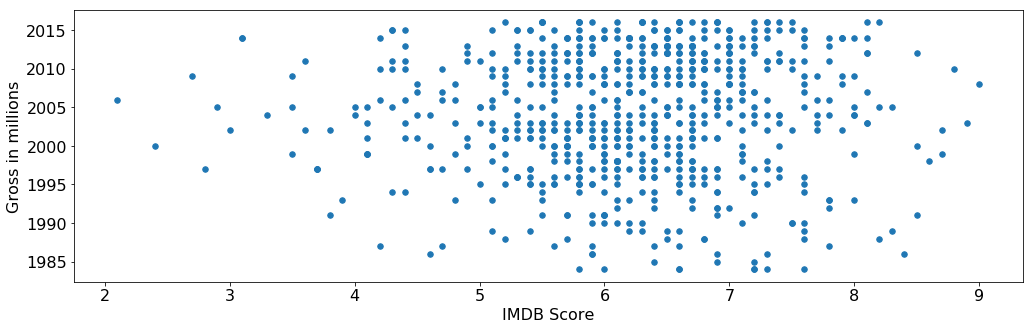

In [58]:
plt.scatter(x=mmdf_action['imdb_score'], y=mmdf_action['title_year'], s=30)
plt.ylabel('Gross in millions')
plt.xlabel('IMDB Score')


Text(0.5, 1.0, 'IMDB Score VS. Gross')

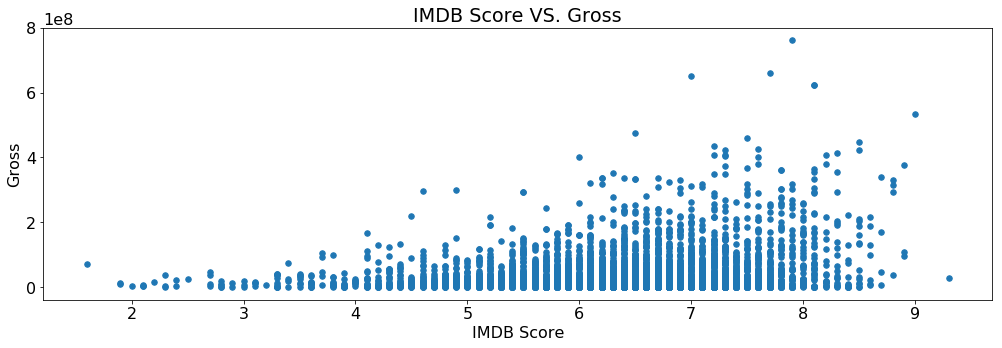

In [61]:
plt.scatter(x=mmdf['imdb_score'], y=mmdf['gross'], s=30)
plt.xlabel('IMDB Score')
plt.ylabel('Gross')
plt.title('IMDB Score VS. Gross')

In [49]:
corr = mmdf_genre.corr()
corr

,title_year,duration,gross,imdb_score
title_year,1.000000,-0.027859,0.098837,-0.020077
duration,-0.027859,1.000000,0.266438,0.370740
gross,0.098837,0.266438,1.000000,0.283358
imdb_score,-0.020077,0.370740,0.283358,1.000000


Text(0.5, 1.0, 'Number of Movies in Dataset Released Each Year')

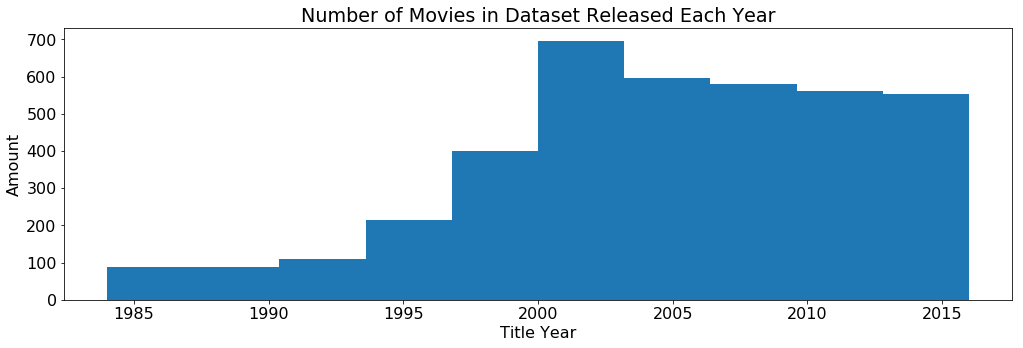

In [50]:
plt.hist(x=mmdf['title_year'])
plt.xlabel('Title Year')
plt.ylabel('Amount')
plt.title('Number of Movies in Dataset Released Each Year')

Text(0.5, 1.0, 'Number of Movies in Dataset Released Each Year')

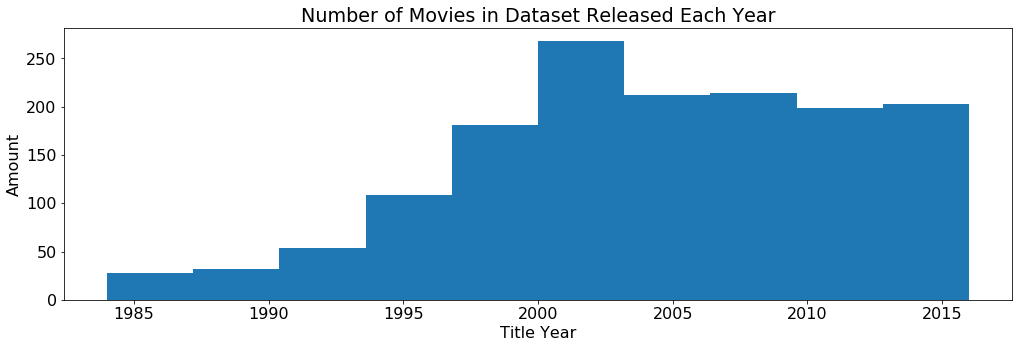

In [62]:
plt.hist(x=mmdf_drama['title_year'])
plt.xlabel('Title Year')
plt.ylabel('Amount')
plt.title('Number of Movies in Dataset Released Each Year')

We can do the above for every genre

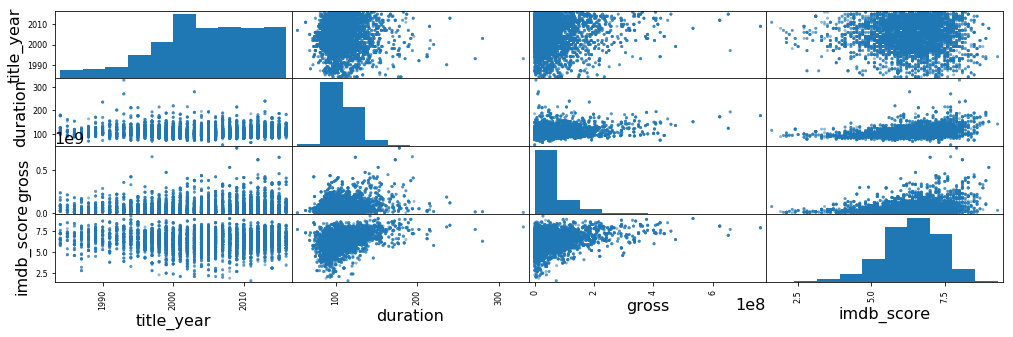

In [63]:
fig=pd.plotting.scatter_matrix(mmdf_genre)

Text(0.5, 1.0, 'Total Number of Each Genre Caegory in Dataset ')

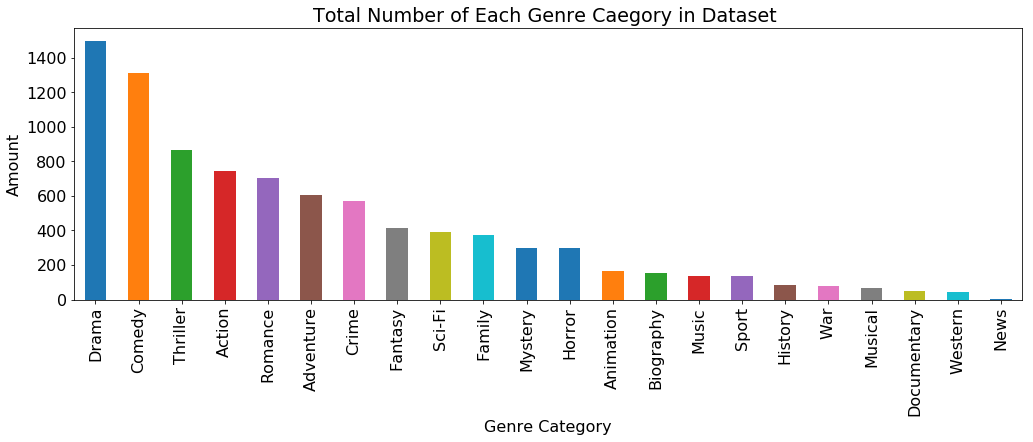

In [64]:
major_counts= mmdf_genre['genres'].value_counts()
major_counts.plot.bar()
plt.xlabel('Genre Category')
plt.ylabel('Amount')
plt.title('Total Number of Each Genre Caegory in Dataset ')

Text(0.5, 1.0, 'Distribution of Films in our Dataset')

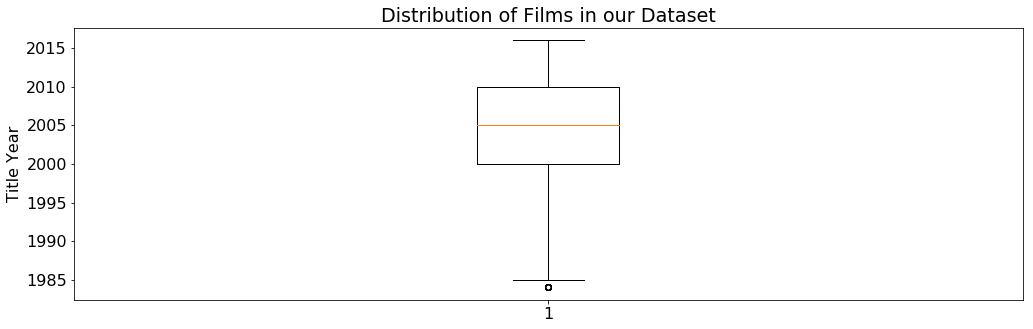

In [67]:
plt.boxplot(mmdf_genre['title_year'])
plt.ylabel('Title Year')
plt.title('Distribution of Films in our Dataset')

Text(0.5, 1.0, 'Spread of IMDB Scores in our dataset')

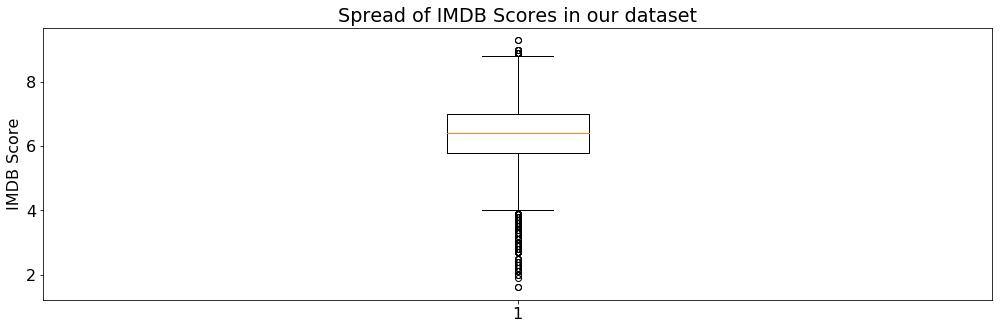

In [68]:
plt.boxplot(mmdf_genre['imdb_score'])
plt.ylabel('IMDB Score')
plt.title('Spread of IMDB Scores in our dataset')

Text(0.5, 1.0, 'Spread of Duration lenghts of movies in our dataset')

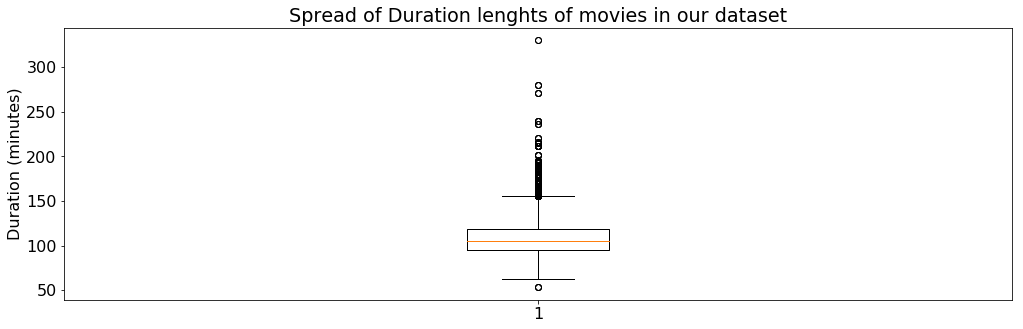

In [69]:
plt.boxplot(mmdf_genre['duration'])
plt.ylabel('Duration (minutes)')
plt.title('Spread of Duration lenghts of movies in our dataset')

Text(0.5, 1.0, 'Duration and Gross Relationship')

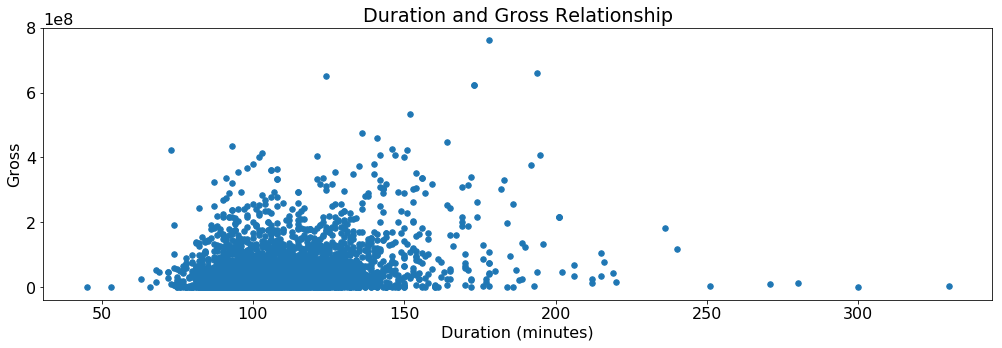

In [71]:
plt.scatter(x=mmdf['duration'], y=mmdf['gross'], s=30)
plt.xlabel('Duration (minutes)')
plt.ylabel('Gross')

plt.title('Duration and Gross Relationship')

Text(0.5, 1.0, 'Total Number of Movies per Content Rating')

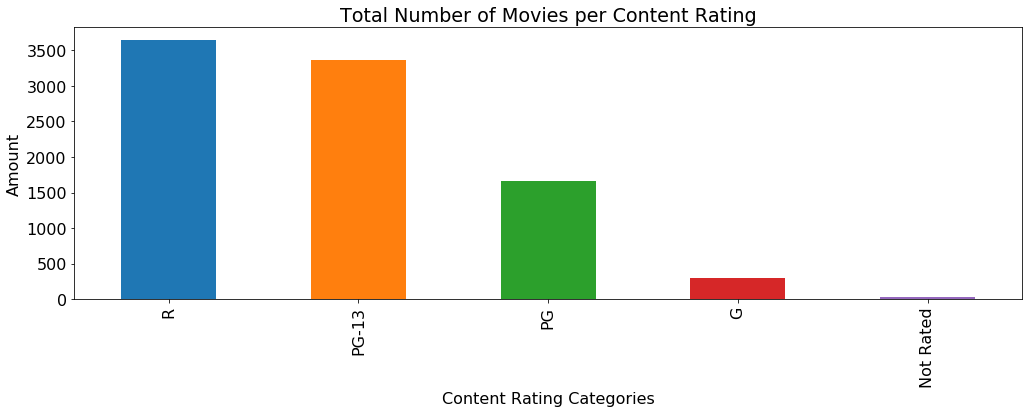

In [72]:

genre_counts=(mmdf_genre['content_rating'].value_counts())
genre_counts.plot.bar()
plt.xlabel('Content Rating Categories')
plt.ylabel("Amount")
plt.title("Total Number of Movies per Content Rating")

Text(0, 0.5, 'Number of Movies')

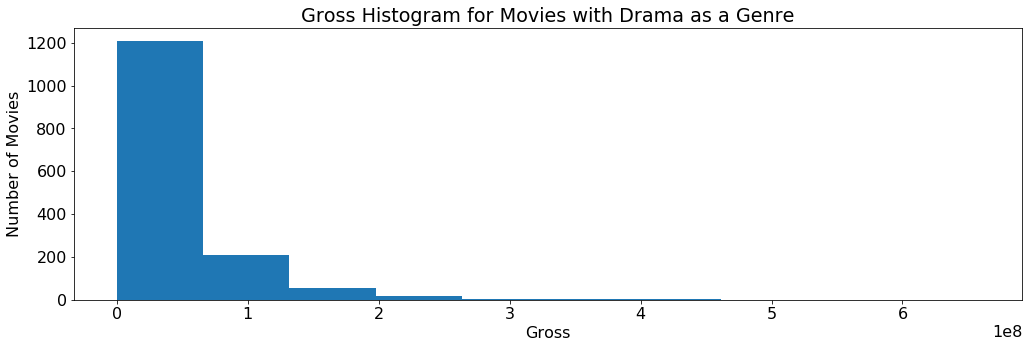

In [73]:
plt.hist(mmdf_genre['gross'].loc[mmdf_genre['genres']=="Drama"])
plt.title("Gross Histogram for Movies with Drama as a Genre")
plt.xlabel('Gross')
plt.ylabel("Number of Movies")

Text(0, 0.5, 'Number of Movies')

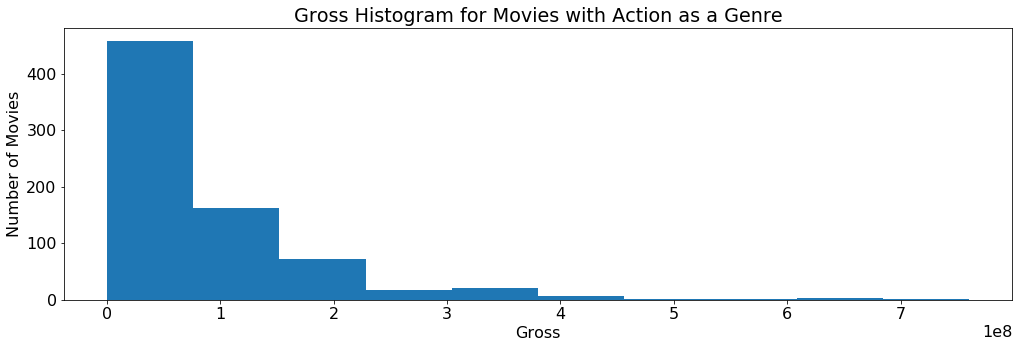

In [74]:
plt.hist(mmdf_genre['gross'].loc[mmdf_genre['genres']=="Action"])
plt.title("Gross Histogram for Movies with Action as a Genre")
plt.xlabel('Gross')
plt.ylabel("Number of Movies")


Text(0, 0.5, 'Number of Movies')

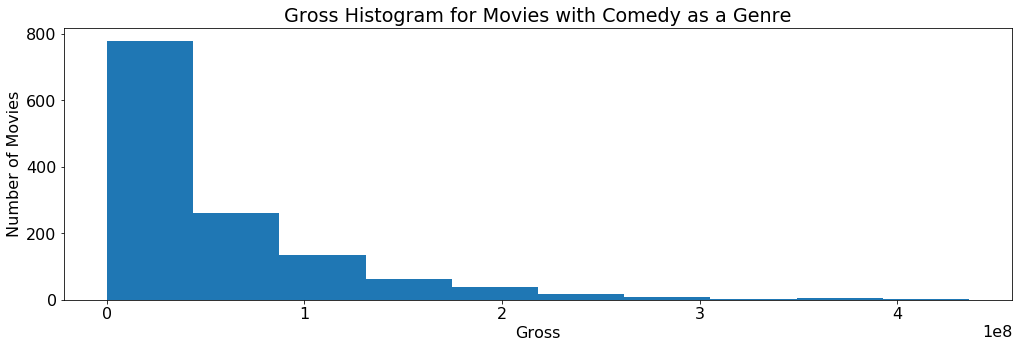

In [75]:
plt.hist(mmdf_genre['gross'].loc[mmdf_genre['genres']=="Comedy"])
plt.title("Gross Histogram for Movies with Comedy as a Genre")
plt.xlabel('Gross')
plt.ylabel("Number of Movies")
